In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
# load metadata

genres = pd.read_csv("fma_metadata/genres.csv", index_col = 0)
features = pd.read_csv("fma_metadata/features.csv", index_col = 0, header = [0, 1, 2])
echonest = pd.read_csv("fma_metadata/echonest.csv", index_col = 0, header = [0, 1, 2])


In [15]:
tracks = pd.read_csv("fma_metadata/tracks.csv", index_col = 0, header = [0, 1])

In [16]:
# shape of each metafile
metadata = ["tracks", "genres", "features", "echonest"]
shape = [tracks.shape, genres.shape, features.shape, echonest.shape]
print("%s: " % metadata, shape)

['tracks', 'genres', 'features', 'echonest']:  [(106574, 52), (163, 4), (106574, 518), (13129, 249)]


### Tracks metadata

In [17]:
tracks.head()

album                                                     \
         comments         date_created        date_released engineer   
track_id                                                               
2               0  2008-11-26 01:44:45  2009-01-05 00:00:00      NaN   
3               0  2008-11-26 01:44:45  2009-01-05 00:00:00      NaN   
5               0  2008-11-26 01:44:45  2009-01-05 00:00:00      NaN   
10              0  2008-11-26 01:45:08  2008-02-06 00:00:00      NaN   
20              0  2008-11-26 01:45:05  2009-01-06 00:00:00      NaN   

                                                                          \
         favorites id                                information listens   
track_id                                                                   
2                4  1                                    <p></p>    6073   
3                4  1                                    <p></p>    6073   
5                4  1                                    <p></p>    6073   
10               4  6                                        NaN   47632   
20               2  4  <p> "spiritual songs" from Nicky Cook</p>    2710   

                        ...       track                         \
         producer tags  ... information interest language_code   
track_id                ...                                      
2             NaN   []  ...         NaN     4656            en   
3             NaN   []  ...         NaN     1470            en   
5             NaN   []  ...         NaN     1933            en   
10            NaN   []  ...         NaN    54881            en   
20            NaN   []  ...         NaN      978            en   

                                                                              \
                                                    license listens lyricist   
track_id                                                                       
2         Attribution-NonCommercial-ShareAlike 3.0 Inter...    1293      NaN   
3         Attribution-NonCommercial-ShareAlike 3.0 Inter...     514      NaN   
5         Attribution-NonCommercial-ShareAlike 3.0 Inter...    1151      NaN   
10        Attribution-NonCommercial-NoDerivatives (aka M...   50135      NaN   
20        Attribution-NonCommercial-NoDerivatives (aka M...     361      NaN   

                                                 
         number publisher tags            title  
track_id                                         
2             3       NaN   []             Food  
3             4       NaN   []     Electric Ave  
5             6       NaN   []       This World  
10            1       NaN   []          Freeway  
20            3       NaN   []  Spiritual Level  

[5 rows x 52 columns]

In [37]:
tracks.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106574 entries, 2 to 155320
Data columns (total 52 columns):
(album, comments)              106574 non-null int64
(album, date_created)          103045 non-null object
(album, date_released)         70294 non-null object
(album, engineer)              15295 non-null object
(album, favorites)             106574 non-null int64
(album, id)                    106574 non-null int64
(album, information)           83149 non-null object
(album, listens)               106574 non-null int64
(album, producer)              18060 non-null object
(album, tags)                  106574 non-null object
(album, title)                 105549 non-null object
(album, tracks)                106574 non-null int64
(album, type)                  100066 non-null object
(artist, active_year_begin)    22711 non-null object
(artist, active_year_end)      5375 non-null object
(artist, associated_labels)    14271 non-null object
(artist, bio)                  71156 n

### Genres metadata

In [18]:
genres.head(10)

,#tracks,parent,title,top_level
genre_id,,,,
1,8693,38,Avant-Garde,38
2,5271,0,International,2
3,1752,0,Blues,3
4,4126,0,Jazz,4
5,4106,0,Classical,5
6,914,38,Novelty,38
7,217,20,Comedy,20
8,868,0,Old-Time / Historic,8
9,1987,0,Country,9


In [41]:
genres.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 163 entries, 1 to 1235
Data columns (total 4 columns):
#tracks      163 non-null int64
parent       163 non-null int64
title        163 non-null object
top_level    163 non-null int64
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


In [19]:
genres.columns

Index(['#tracks', 'parent', 'title', 'top_level'], dtype='object')

In [20]:
genres['title'].unique()

array(['Avant-Garde', 'International', 'Blues', 'Jazz', 'Classical',
       'Novelty', 'Comedy', 'Old-Time / Historic', 'Country', 'Pop',
       'Disco', 'Rock', 'Easy Listening', 'Soul-RnB', 'Electronic',
       'Sound Effects', 'Folk', 'Soundtrack', 'Funk', 'Spoken', 'Hip-Hop',
       'Audio Collage', 'Punk', 'Post-Rock', 'Lo-Fi', 'Field Recordings',
       'Metal', 'Noise', 'Psych-Folk', 'Krautrock', 'Jazz: Vocal',
       'Experimental', 'Electroacoustic', 'Ambient Electronic',
       'Radio Art', 'Loud-Rock', 'Latin America', 'Drone', 'Free-Folk',
       'Noise-Rock', 'Psych-Rock', 'Bluegrass', 'Electro-Punk', 'Radio',
       'Indie-Rock', 'Industrial', 'No Wave', 'Free-Jazz',
       'Experimental Pop', 'French', 'Reggae - Dub', 'Afrobeat',
       'Nerdcore', 'Garage', 'Indian', 'New Wave', 'Post-Punk', 'Sludge',
       'African', 'Freak-Folk', 'Jazz: Out', 'Progressive',
       'Alternative Hip-Hop', 'Death-Metal', 'Middle East',
       'Singer-Songwriter', 'Ambient', 'Hardcore', 

In [21]:
print("There are", len(genres['title'].unique()), "unique genres")

There are 163 unique genres


(1, 38154)

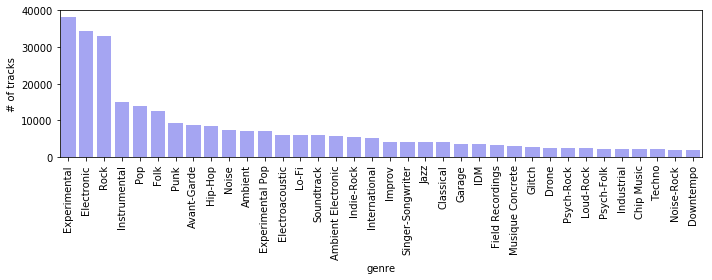

In [23]:
# number of tracks per genre
x = genres[genres['#tracks'] > 2000].sort_values('#tracks', ascending=False)
plt.figure(figsize=(10, 4))
p = sns.barplot('title', '#tracks', data=x, color='b', alpha=0.4)
p.set_xlabel('genre')
p.set_ylabel('# of tracks')
plt.xticks(rotation=90)
plt.tight_layout()
# plt.savefig('genre_distribution.pdf')

genres.loc[genres['#tracks'] > 0, '#tracks'].min(), genres['#tracks'].max()


Number of tracks per top-level genre (small)

Rock                   14182
Experimental           10608
Electronic              9372
Hip-Hop                 3552
Folk                    2803
Pop                     2332
Instrumental            2079
International           1389
Classical               1230
Jazz                     571
Old-Time / Historic      554
Spoken                   423
Country                  194
Soul-RnB                 175
Blues                    110
Easy Listening            24
Name: (track, genre_top), dtype: int64

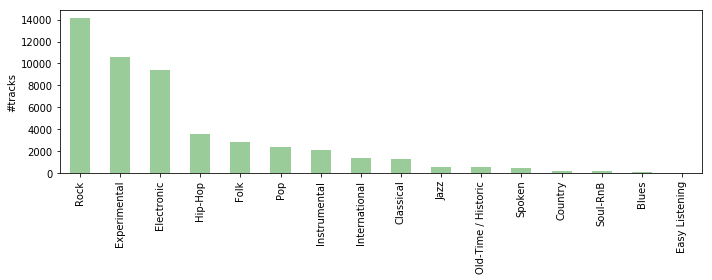

In [31]:
# Number of tracks per top-level genre (small).
small = tracks[tracks['set', 'subset'] <= 'small']
small = small['track', 'genre_top'].value_counts()
plt.figure(figsize=(10, 4))
small.plot.bar(color='g', alpha=0.4)
plt.ylabel('#tracks')
plt.tight_layout()
# plt.savefig('genre_top_distribution.pdf')

small

### Features metadata

In [24]:
features.head()

feature    chroma_cens                                                    \
statistics    kurtosis                                                     
number              01        02        03        04        05        06   
track_id                                                                   
2             7.180653  5.230309  0.249321  1.347620  1.482478  0.531371   
3             1.888963  0.760539  0.345297  2.295201  1.654031  0.067592   
5             0.527563 -0.077654 -0.279610  0.685883  1.937570  0.880839   
10            3.702245 -0.291193  2.196742 -0.234449  1.367364  0.998411   
20           -0.193837 -0.198527  0.201546  0.258556  0.775204  0.084794   

feature                                             ...   tonnetz            \
statistics                                          ...       std             
number            07        08        09        10  ...        04        05   
track_id                                            ...                       
2           1.481593  2.691455  0.866868  1.341231  ...  0.054125  0.012226   
3           1.366848  1.054094  0.108103  0.619185  ...  0.063831  0.014212   
5          -0.923192 -0.927232  0.666617  1.038546  ...  0.040730  0.012691   
10          1.770694  1.604566  0.521217  1.982386  ...  0.074358  0.017952   
20         -0.289294 -0.816410  0.043851 -0.804761  ...  0.095003  0.022492   

feature                     zcr                                          \
statistics             kurtosis       max      mean    median       min   
number            06         01        01        01        01        01   
track_id                                                                  
2           0.012111   5.758890  0.459473  0.085629  0.071289  0.000000   
3           0.017740   2.824694  0.466309  0.084578  0.063965  0.000000   
5           0.014759   6.808415  0.375000  0.053114  0.041504  0.000000   
10          0.013921  21.434212  0.452148  0.077515  0.071777  0.000000   
20          0.021355  16.669037  0.469727  0.047225  0.040039  0.000977   

feature                         
statistics      skew       std  
number            01        01  
track_id                        
2           2.089872  0.061448  
3           1.716724  0.069330  
5           2.193303  0.044861  
10          3.542325  0.040800  
20          3.189831  0.030993  

[5 rows x 518 columns]

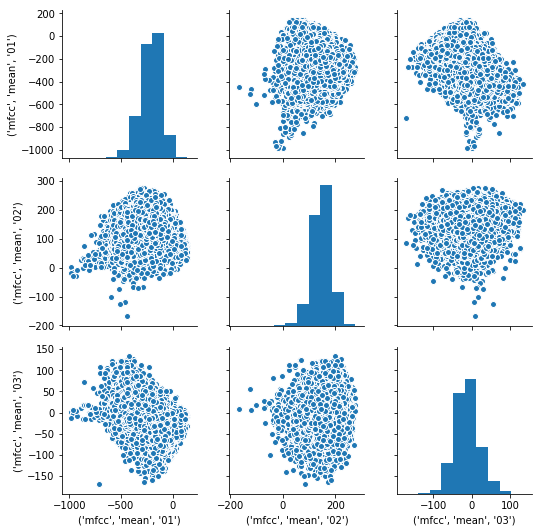

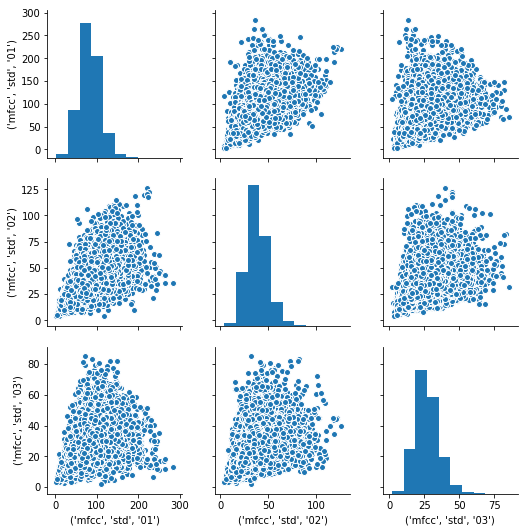

In [32]:
sns.pairplot(features.loc[:, ('mfcc', 'mean', slice('01','03'))]);
sns.pairplot(features.loc[:, ('mfcc', 'std', slice('01','03'))]);

### Echonest metadata
#### audio features

In [25]:
echonest.head()

echonest                                                    \
         audio_features                                                     
           acousticness danceability    energy instrumentalness  liveness   
track_id                                                                    
2              0.416675     0.675894  0.634476         0.010628  0.177647   
3              0.374408     0.528643  0.817461         0.001851  0.105880   
5              0.043567     0.745566  0.701470         0.000697  0.373143   
10             0.951670     0.658179  0.924525         0.965427  0.115474   
134            0.452217     0.513238  0.560410         0.019443  0.096567   

                                                                        ...  \
                                           metadata                     ...   
         speechiness    tempo   valence  album_date         album_name  ...   
track_id                                                                ...   
2           0.159310  165.922  0.576661         NaN                NaN  ...   
3           0.461818  126.957  0.269240         NaN                NaN  ...   
5           0.124595  100.260  0.621661         NaN                NaN  ...   
10          0.032985  111.562  0.963590  2008-03-11  Constant Hitmaker  ...   
134         0.525519  114.290  0.894072         NaN                NaN  ...   

                                                                              \
         temporal_features                                                     
                       214        215       216       217       218      219   
track_id                                                                       
2                -1.992303   6.805694  0.233070  0.192880  0.027455  0.06408   
3                -1.582331   8.889308  0.258464  0.220905  0.081368  0.06413   
5                -2.288358  11.527109  0.256821  0.237820  0.060122  0.06014   
10               -3.662988  21.508228  0.283352  0.267070  0.125704  0.08082   
134              -1.452696   2.356398  0.234686  0.199550  0.149332  0.06440   

                                                     
                                                     
               220       221        222         223  
track_id                                             
2          3.67696   3.61288  13.316690  262.929749  
3          6.08277   6.01864  16.673548  325.581085  
5          5.92649   5.86635  16.013849  356.755737  
10         8.41401   8.33319  21.317064  483.403809  
134       11.26707  11.20267  26.454180  751.147705  

[5 rows x 249 columns]

In [26]:
print('Echonest features available for {} tracks.'.format(len(echonest)))

Echonest features available for 13129 tracks.


In [27]:
print('{1} features for {0} tracks'.format(*features.shape))
columns = ['mfcc', 'chroma_cens', 'tonnetz', 'spectral_contrast']
columns.append(['spectral_centroid', 'spectral_bandwidth', 'spectral_rolloff'])
columns.append(['rmse', 'zcr'])

518 features for 106574 tracks
